# Baixa estruturas de aeroportos como GeoJSON

Author: [Carlos M. Abreu](magno.mabreu@gmail.com)

In [1]:
import osmnx as ox
import shapely
import geopandas

In [2]:
# north, south, east, west
# gdf = ox.geometries_from_bbox( 5.79, -33.87, -31.20, -74.09 , paises)

In [3]:
predios = {"building": True}
outros = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
aerodromos = {"aeroway" : ["runway","jet_bridge","landing_light","construction","shelter","aerodrome","beacon","taxiway","apron","control_tower","control_center","gate","hangar","helipad","heliport","navigationaid","taxilane","terminal","windsock","highway_strip","parking_position","holding_position","airstrip","stopway","tower"]}

In [4]:
airport_icao_code = "São Pedro da Aldeia" 

In [5]:
# Busca os componentes do aeródromo
gdf = ox.geometries.geometries_from_place(airport_icao_code, aerodromos)
if 'nodes' in gdf.columns: gdf.drop('nodes', axis='columns', inplace=True)
if 'ways' in gdf.columns: gdf.drop('ways', axis='columns', inplace=True)

/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


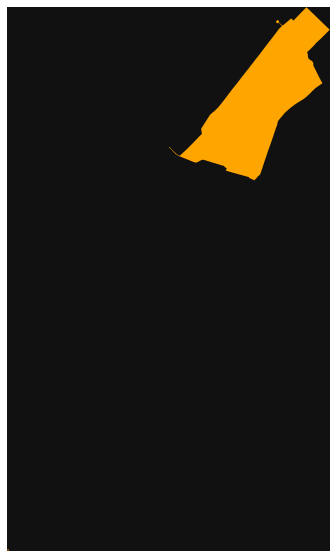

In [6]:
# Prévia do resultado
fig, ax = ox.plot_footprints(gdf, figsize=(10, 10))

In [7]:
# Salva as geometrias como GeoJson
gdf.to_file(airport_icao_code + '.geojson', driver='GeoJSON')

Agora coleta todos os edifícios na área do aeródromo

In [8]:
# cria um bounding box do aeródromo
bound = shapely.geometry.box(*gdf.total_bounds)
# print(bound)
# bound

In [9]:
bbuffer = bound.buffer( 0.025, resolution=2, )
# print( bbuffer )
# bbuffer

In [10]:
df = geopandas.GeoDataFrame({'geometry': [bbuffer]},crs=4326)
newbound = shapely.geometry.box(*df.total_bounds)
# print( newbound )
# newbound

In [11]:
# busca os edifícios dentro deste retângulo
gdf_predios = ox.geometries_from_polygon(newbound, predios)
if 'nodes' in gdf_predios.columns: gdf_predios.drop('nodes', axis='columns', inplace=True)
if 'ways' in gdf_predios.columns: gdf_predios.drop('ways', axis='columns', inplace=True)

/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


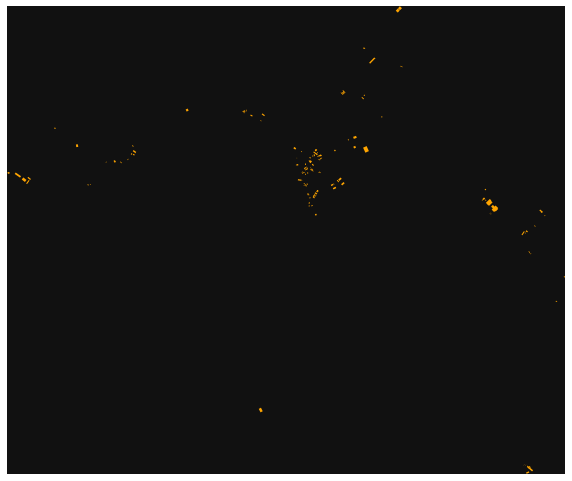

In [12]:
# Prévia do resultado
ff, aa = ox.plot_footprints(gdf_predios, figsize=(10, 10))

In [13]:
# Salva como GeoJSON
gdf_predios.to_file(airport_icao_code + '-predios.geojson', driver='GeoJSON')